<a href="https://colab.research.google.com/github/singhsumit7890/Infosys_Stroke-Patient-Healthcare-Using-Deep-Learning/blob/main/Milestone3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comparison of Different ML Models with Their Accuracies and RMSEs**

---



In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [62]:
#DATASET
!gdown https://drive.google.com/uc?id=1XyhVIZaKYZczlM2alun_fofilqTBq_9c

Downloading...
From: https://drive.google.com/uc?id=1XyhVIZaKYZczlM2alun_fofilqTBq_9c
To: /content/healthcare-dataset-stroke-data.csv
100% 317k/317k [00:00<00:00, 70.3MB/s]


In [63]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
# Handling NULL Value
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# Data Preprocessing: Encoding Categorical Variables and Dropping Irrelevant Features






In [64]:
df['Residence_type'] = df['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)

df['Urban/Rural'] = df['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)


df['work_type_Never_worked'] = df['work_type'].apply(lambda x: 1 if x == 'Never_worked' else 0)
df['work_type_Private'] = df['work_type'].apply(lambda x: 1 if x == 'Private' else 0)
df['work_type_Self_employed'] = df['work_type'].apply(lambda x: 1 if x == 'Self-employed' else 0)


df['smoking_status_formerly_smoked'] = df['smoking_status'].apply(lambda x: 1 if x == 'formerly smoked' else 0)
df['smoking_status_never_smoked'] = df['smoking_status'].apply(lambda x: 1 if x == 'never smoked' else 0)
df['smoking_status_smokes'] = df['smoking_status'].apply(lambda x: 1 if x == 'smokes' else 0)

df_model = df.copy()

df_model.drop(['Residence_type', 'work_type', 'smoking_status', 'gender', 'ever_married'], axis=1, inplace=True)

In [65]:
df_model.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Urban/Rural,work_type_Never_worked,work_type_Private,work_type_Self_employed,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,0,0,0,1,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,0,0,1,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,0,0,0,1,0,1,0


# **RMSE and Accuracy Calculation**

---



# 1. RMSE (Root Mean Squared Error):

- RMSE is a metric used to measure the difference between the predicted and actual values. It gives a sense of how well the model’s predictions align with the true values.

 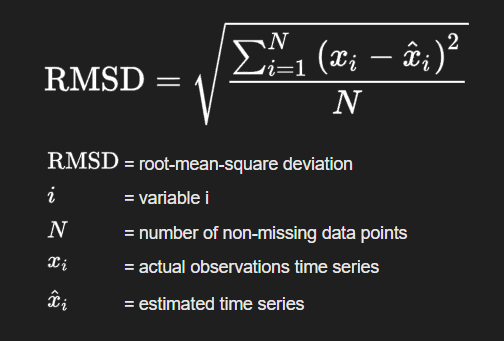


 - Lower RMSE values indicate better model performance, as it suggests the predictions are closer to the actual values.


 # 2. Accuracy:

- Accuracy is a metric commonly used for classification problems. It measures the percentage of correctly predicted instances out of the total instances.
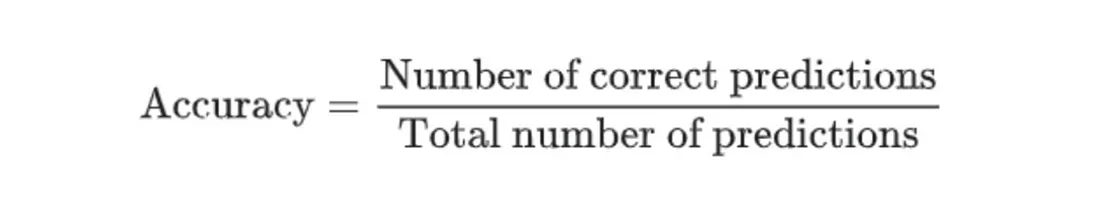


- Accuracy is most useful when the classes are balanced, meaning the number of samples in each class is roughly the same. High accuracy indicates that a large portion of the predictions are correct.


# Splitting the Dataset into Training and Testing Sets

In [66]:
X = df_model.drop('stroke', axis=1) # independent var
y = df_model['stroke'] # Dependent var

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,Urban/Rural,work_type_Never_worked,work_type_Private,work_type_Self_employed,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
802,4970,79.00,0,0,112.64,28.5,0,0,0,1,1,0,0
3927,56137,62.00,0,0,88.32,36.3,0,0,1,0,0,0,0
2337,54590,21.00,0,0,59.52,33.7,0,0,1,0,0,1,0
3910,36548,31.00,0,0,65.70,30.4,0,0,0,0,1,0,0
1886,61171,31.00,0,0,59.63,19.9,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,13846,43.00,0,0,88.00,30.6,0,0,0,0,0,1,0
466,1307,61.00,1,0,170.05,60.2,0,0,1,0,0,0,1
3092,31481,1.16,0,0,97.28,17.8,0,0,0,0,0,0,0
3772,61827,80.00,0,0,196.08,31.0,0,0,0,1,1,0,0


# **Different ML Models**

---



# (1) Training and Evaluating the Linear Regression Model

- Description: Linear Regression is a statistical method used for modeling the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data.
- Use Case: It is widely used when the relationship between the independent variables and dependent variable is assumed to be linear.
- Strengths: Simple, interpretable, and effective for linear relationships.
- Weaknesses: Can perform poorly if the data has complex patterns or noise that do not follow a linear relationship.

In [73]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_predictions = linear_reg.predict(X_test)
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_predictions))
linear_reg_rmse*100
print("Linear Regression RMSE:", linear_reg_rmse)

Linear Regression RMSE: 0.22762568871596722


# (2) Training and Evaluating the Lasso Regression Model

- Description: Lasso (Least Absolute Shrinkage and Selection Operator) Regression is a type of linear regression that uses L1 regularization. It adds a penalty term to the cost function that forces some coefficients to be exactly zero, thereby performing feature selection.
- Use Case: Lasso is useful when you have a high-dimensional dataset and want to shrink the coefficients of less important features to zero, making them irrelevant.
- Strengths: Helps with feature selection by eliminating unimportant features.
- Weaknesses: Can underperform if the true relationship between features and the target variable is complex and cannot be captured by the L1 penalty.

In [74]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
lasso_reg_predictions = lasso_reg.predict(X_test)
lasso_reg_rmse = np.sqrt(mean_squared_error(y_test, lasso_reg_predictions))
lasso_reg_rmse*100
print("Lasso Regression RMSE:", lasso_reg_rmse)


Lasso Regression RMSE: 0.23758795130268975


# (3) Training and Evaluating the Ridge Regression Model

- Description: Ridge Regression is another form of linear regression, but it uses L2 regularization. Instead of setting coefficients to zero, it shrinks them toward zero, helping to prevent overfitting in models with many features.
- Use Case: It is useful when the model suffers from multicollinearity (when features are highly correlated) and when regularization is needed to prevent overfitting.
- Strengths: Effective at reducing model complexity and overfitting by controlling the size of coefficients.
- Weaknesses: Doesn't perform feature selection like Lasso; it just reduces the magnitude of the coefficients.

In [77]:
Ridge_reg = Ridge()
Ridge_reg.fit(X_train, y_train)
Ridge_reg_predictions = Ridge_reg.predict(X_test)
Ridge_reg_rmse = np.sqrt(mean_squared_error(y_test, Ridge_reg_predictions))
Ridge_reg_rmse*100
print("Ridge Regression RMSE:", Ridge_reg_rmse)

Ridge Regression RMSE: 0.22762738266440813


# (4) Training and Evaluating the Logistic Regression Model

- Description: Logistic Regression is a statistical method for binary classification that models the probability of a binary outcome using a logistic function. Although it is used for classification, in your case, it's being used for regression by predicting probabilities of the classes.
- Use Case: It is ideal for problems where the target variable is categorical (usually binary).
- Strengths: Efficient and easy to implement for binary classification problems, works well with linearly separable data.
- Weaknesses: Not suitable for non-linear relationships and can underperform with complex relationships.

In [76]:
clf=LogisticRegression()
clf.fit(X_train, y_train)
Logistic_pred = clf.predict(X_test)
Log_reg_rmse = np.sqrt(mean_squared_error(y_test, Logistic_pred))
Log_reg_rmse*100
print("Logistic Regression RMSE:", Log_reg_rmse)

Logistic Regression RMSE: 0.24430900199135466


# Model Comparison: RMSE and Accuracy

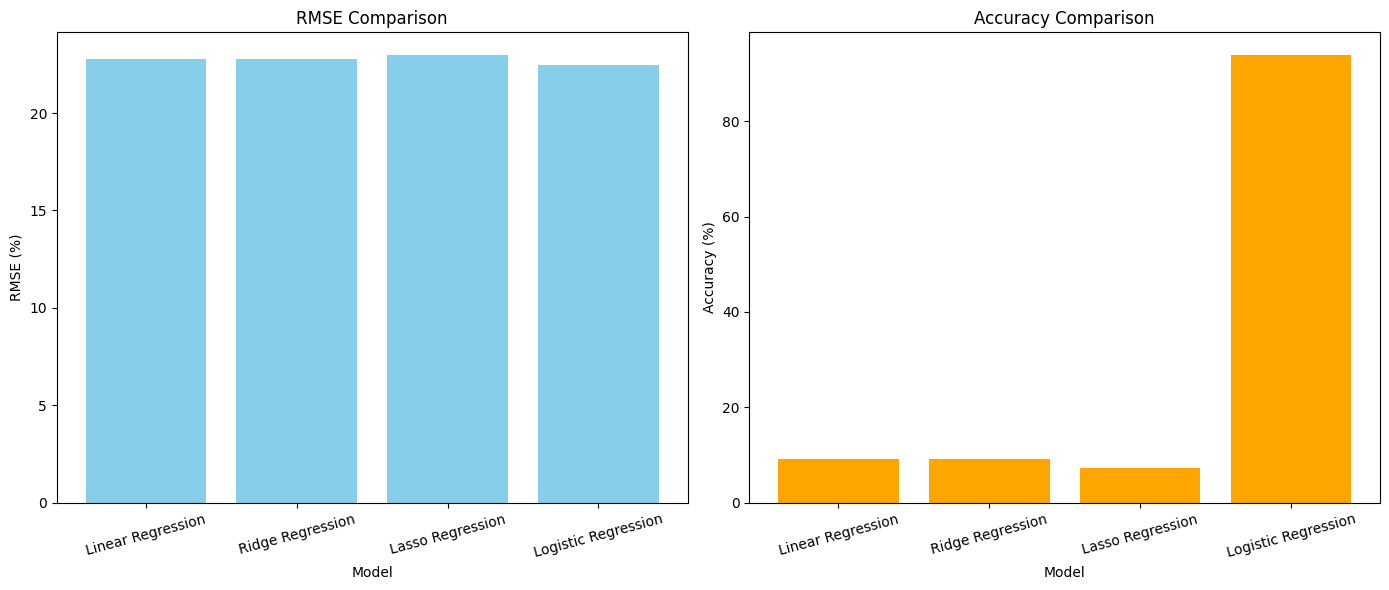

Linear Regression: RMSE = 22.76%, Accuracy = 9.08%
Ridge Regression: RMSE = 22.76%, Accuracy = 9.07%
Lasso Regression: RMSE = 22.99%, Accuracy = 7.25%
Logistic Regression: RMSE = 22.49%, Accuracy = 93.93%


In [78]:
# Dictionary to store results
results = {
    "Model": [],
    "RMSE": [],
    "Accuracy": []
}

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_predictions = linear_reg.predict(X_test)
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_predictions))
linear_reg_accuracy = linear_reg.score(X_test, y_test) * 100
results["Model"].append("Linear Regression")
results["RMSE"].append(linear_reg_rmse * 100)
results["Accuracy"].append(linear_reg_accuracy)

# Ridge Regression
ridge_reg = Ridge(alpha=1, random_state=42)
ridge_reg.fit(X_train, y_train)
ridge_reg_predictions = ridge_reg.predict(X_test)
ridge_reg_rmse = np.sqrt(mean_squared_error(y_test, ridge_reg_predictions))
ridge_reg_accuracy = ridge_reg.score(X_test, y_test) * 100
results["Model"].append("Ridge Regression")
results["RMSE"].append(ridge_reg_rmse * 100)
results["Accuracy"].append(ridge_reg_accuracy)

# Lasso Regression
lasso_reg = Lasso(alpha=0.1, random_state=42)
lasso_reg.fit(X_train, y_train)
lasso_reg_predictions = lasso_reg.predict(X_test)
lasso_reg_rmse = np.sqrt(mean_squared_error(y_test, lasso_reg_predictions))
lasso_reg_accuracy = lasso_reg.score(X_test, y_test) * 100
results["Model"].append("Lasso Regression")
results["RMSE"].append(lasso_reg_rmse * 100)
results["Accuracy"].append(lasso_reg_accuracy)

# Logistic Regression
logistic_reg = LogisticRegression(random_state=42, max_iter=1000)
logistic_reg.fit(X_train, y_train)
logistic_reg_predictions = logistic_reg.predict_proba(X_test)[:, 1]
logistic_reg_rmse = np.sqrt(mean_squared_error(y_test, logistic_reg_predictions))
logistic_reg_accuracy = logistic_reg.score(X_test, y_test) * 100
results["Model"].append("Logistic Regression")
results["RMSE"].append(logistic_reg_rmse * 100)
results["Accuracy"].append(logistic_reg_accuracy)

# Plot RMSE and Accuracy
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# RMSE Plot
ax[0].bar(results["Model"], results["RMSE"], color='skyblue')
ax[0].set_title("RMSE Comparison")
ax[0].set_ylabel("RMSE (%)")
ax[0].set_xlabel("Model")
ax[0].set_xticklabels(results["Model"], rotation=15)

# Accuracy Plot
ax[1].bar(results["Model"], results["Accuracy"], color='orange')
ax[1].set_title("Accuracy Comparison")
ax[1].set_ylabel("Accuracy (%)")
ax[1].set_xlabel("Model")
ax[1].set_xticklabels(results["Model"], rotation=15)

plt.tight_layout()
plt.show()

# Print Observations
for model, rmse, acc in zip(results["Model"], results["RMSE"], results["Accuracy"]):
    print(f"{model}: RMSE = {rmse:.2f}%, Accuracy = {acc:.2f}%")


# **OBSERVATIONS**

---

(1) Linear Regression:

- RMSE = 22.76%, Accuracy = 9.08%
- Linear Regression has a relatively high RMSE, indicating that the model's predictions are considerably off from the actual values. The low accuracy suggests that the model may not be well-suited for this dataset, especially considering that Linear Regression is typically used for regression tasks where the outcome is continuous. The model might not be capturing the underlying relationships effectively.

(2) Ridge Regression:

- RMSE = 22.76%, Accuracy = 9.07%
- Ridge Regression, similar to Linear Regression, performs with a high RMSE, showing significant prediction errors. The accuracy is slightly lower than Linear Regression, but it's still relatively poor. Ridge Regression introduces regularization to reduce overfitting, yet in this case, it doesn't appear to improve the model's performance. The dataset might not benefit from regularization, or the model parameters need further tuning.

(3) Lasso Regression:

- RMSE = 22.99%, Accuracy = 7.25%
- Lasso Regression shows the highest RMSE and the lowest accuracy among the models. Lasso applies L1 regularization, which tends to push some coefficients to zero. However, this could result in too much simplification, leading to underfitting. The model is likely too simple for the dataset, not capturing essential features or relationships, hence the low performance.

(4) Logistic Regression:

- RMSE = 22.49%, Accuracy = 93.93%
- Logistic Regression performs significantly better than the other models in terms of accuracy, reaching nearly 94%. This suggests that Logistic Regression, which is typically used for classification tasks, is more suitable for this problem. Despite the relatively high RMSE (which may be due to the mismatch between regression-based error calculation and classification task), the accuracy shows that Logistic Regression is able to classify the data effectively.

# Conclusion:

- Logistic Regression outperforms the other models with 93.93% accuracy and lower RMSE, making it the best choice for this classification task.
- Linear Regression, Ridge Regression, and Lasso Regression all show poor performance with high RMSE and low accuracy, indicating they are not suitable for this classification problem.
- Regularization techniques (Ridge and Lasso) did not improve the models' effectiveness in this case.
- Logistic Regression is the optimal model for this task, while regression models should be avoided.